In [15]:
import pandas as pd
from IPython.display import SVG
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

In [32]:
# prepare data
dummy = data.fetch_california_housing()
df = pd.DataFrame(dummy.data, columns = dummy.feature_names)
values = []
q0 = np.min(dummy.target)
q20 = np.percentile(dummy.target, 20)
q40 = np.percentile(dummy.target, 40)
q60 = np.percentile(dummy.target, 60)
q80 = np.percentile(dummy.target, 80)
q100 = np.max(dummy.target)
for item in dummy.target:
    if q0 <= item < q20:
        values.append(1)
    elif q20 <= item < q40:
        values.append(2)
    elif q40 <= item < q60:
        values.append(3)
    elif q60 <= item < q80:
        values.append(4)
    elif q80 <= item <= q100:
        values.append(5)
    else:
        raise ValueError("Can't classify " + str(item) + " by its quartile")
response = 'quartile'
df[response] = values

# verify that the data is split into five equal groups
print(f'Length of data frame: {len(df)}')
for i in range(1, 6):
    print(f'Length of segment {i}: {len(df[df[response] == i])}')

# build and test the classifier
training, testing = train_test_split(df, test_size=.75)
treeclf = DecisionTreeClassifier(max_depth=10, random_state=2)
treeclf.fit(training.drop(response, 1), training[response])
y_pred = treeclf.predict(testing.drop(response, 1))
p,r,f,s = precision_recall_fscore_support(testing[response], y_pred)
print('\nF1 Scores for each class:')
for fScore in f:
    print(fScore)

Length of data frame: 20640
Length of segment 1: 4120
Length of segment 2: 4124
Length of segment 3: 4138
Length of segment 4: 4128
Length of segment 5: 4130

F1 Scores for each class:
0.7461290322580646
0.5095332018408941
0.4953874538745387
0.494371333439036
0.6878090366581414


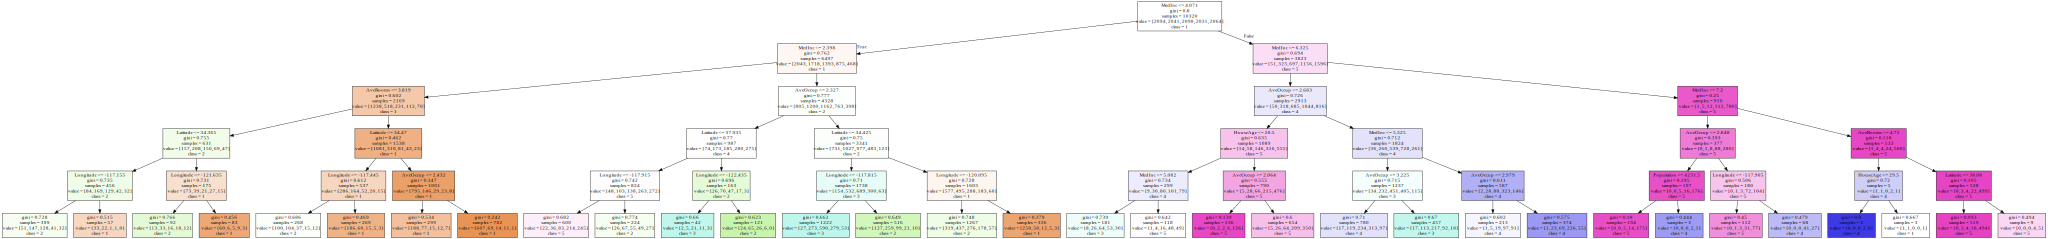

In [17]:
# create a Graphviz file
classNames = ['1', '2', '3', '4', '5']
features = df.drop(response, 1).columns
f = export_graphviz(treeclf,
                    out_file=open("houseValues.dot", 'w'),
                    feature_names=features,
                    class_names=classNames,
                    filled = True)
graph = Source(tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=features,
                                    class_names=classNames, filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)
